In [1]:
import os
import pandas as pd
from tqdm.autonotebook import tqdm
import glob
import patoolib
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


KeyboardInterrupt: 

In [ ]:
# O diretorio onde os arquivos do repositorio clonado estão
Diretorio_local = "C:/Users/jacks/OneDrive/Projetos/combustiveis_automotivos"

dest_dir = f"{Diretorio_local}/arquivos-extraidos/"

rar_files = [f"{Diretorio_local}/Combustíveis Automotivos-2012-a-2022.rar"]

In [ ]:
csv_files = glob.glob(f"{dest_dir}*.csv")

dataframes = []

progress_bar = tqdm(csv_files, desc="Lendo arquivos CSV")

encodings = ['utf-8', 'ISO-8859-1', 'latin-1']

for csv_file in progress_bar:
    for encoding in encodings:
        try:
            df = pd.read_csv(csv_file, sep=';', encoding=encoding)
            dataframes.append(df)
            break
        except Exception as e:
            print(f"Tentando codificação {encoding} para o arquivo {csv_file} - Erro: {e}")


combustiveis_automotivos_df = pd.concat(dataframes, ignore_index=True)
print("\nArquivos extraidos com sucesso!")

Lendo arquivos CSV:   0%|          | 0/22 [00:00<?, ?it/s]

Lendo arquivos CSV:  77%|███████▋  | 17/22 [01:12<00:17,  3.54s/it]C:\Users\jacks\AppData\Local\Temp\ipykernel_3244\3907117049.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, sep=';', encoding=encoding)
Lendo arquivos CSV:  86%|████████▋ | 19/22 [01:17<00:08,  2.90s/it]

Tentando codificação utf-8 para o arquivo C:/Users/jacks/OneDrive/Projetos/combustiveis_automotivos/arquivos-extraidos\ca-2021-02.csv - Erro: 'utf-8' codec can't decode byte 0xd3 in position 34: invalid continuation byte


Lendo arquivos CSV: 100%|██████████| 22/22 [01:30<00:00,  4.11s/it]



Arquivos extraidos com sucesso!


In [ ]:
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2012,"2,589",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2012,"1,969",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,03/01/2012,"1,879",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,GASOLINA,05/01/2012,"2,83",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,ETANOL,05/01/2012,"2,27",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
combustiveis_automotivos_df.isnull().sum()

Regiao - Sigla             0
Estado - Sigla             0
Municipio                  0
Revenda                    0
CNPJ da Revenda            0
Nome da Rua                0
Numero Rua              6476
Complemento          8345295
Bairro                 37016
Cep                        0
Produto                    0
Data da Coleta             1
Valor de Venda             1
Valor de Compra      7363763
Unidade de Medida          1
Bandeira                   1
dtype: int64

In [ ]:
combustiveis_automotivos_df.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
11168705,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,30/12/2022,"5,04",NaN,R$ / litro,MAXSUL
11168706,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,30/12/2022,"6,19",NaN,R$ / litro,MAXSUL
11168707,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,30/12/2022,"5,31",NaN,R$ / litro,VIBRA ENERGIA
11168708,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,30/12/2022,"5,11",NaN,R$ / litro,VIBRA ENERGIA
11168709,S,SC,BLUMENAU,FISCHER COMBUSTIVEL EIRELI,31.713.751/0002-60,RUA SETE DE SETEMBRO,780,POSTO,CENTRO,89010-200,GASOLINA,30/12/2022,"5,09",NaN,R$ / litro,IPIRANGA


In [ ]:
combustiveis_automotivos_df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [ ]:
combustiveis_automotivos_df = combustiveis_automotivos_df.drop(['Revenda',
                                                                'CNPJ da Revenda',
                                                                'Nome da Rua',
                                                                'Numero Rua',
                                                                'Complemento',
                                                                'Bairro',
                                                                'Cep',
                                                                'Valor de Compra'
], axis=1)

In [ ]:
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,GASOLINA,03/01/2012,"2,589",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,ETANOL,03/01/2012,"1,969",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,DIESEL,03/01/2012,"1,879",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOLINA,05/01/2012,"2,83",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,ETANOL,05/01/2012,"2,27",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
combustiveis_automotivos_df = combustiveis_automotivos_df.dropna(axis=0)

In [ ]:
combustiveis_automotivos_df['Unidade de Medida'].unique()

array(['R$ / litro', 'R$ / m³'], dtype=object)

In [ ]:
combustiveis_automotivos_df['Unidade de Medida'] = combustiveis_automotivos_df['Unidade de Medida'].str.replace('R$', '').str.replace('/', '').str.replace(' ', '')
combustiveis_automotivos_df['Unidade de Medida'] = combustiveis_automotivos_df['Unidade de Medida'].str.replace('litro', 'Litro')

In [ ]:
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,GASOLINA,03/01/2012,"2,589",Litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,ETANOL,03/01/2012,"1,969",Litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,DIESEL,03/01/2012,"1,879",Litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOLINA,05/01/2012,"2,83",Litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,ETANOL,05/01/2012,"2,27",Litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
combustiveis_automotivos_df.dtypes

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Produto              object
Data da Coleta       object
Valor de Venda       object
Unidade de Medida    object
Bandeira             object
dtype: object

In [ ]:
combustiveis_automotivos_df['Valor de Venda'] = combustiveis_automotivos_df['Valor de Venda'].str.replace(',', '.').astype(float)

In [ ]:
combustiveis_automotivos_df

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,GASOLINA,03/01/2012,2.589,Litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,ETANOL,03/01/2012,1.969,Litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,DIESEL,03/01/2012,1.879,Litro,PETROBRAS DISTRIBUIDORA S.A.
3,CO,DF,BRASILIA,GASOLINA,05/01/2012,2.830,Litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,ETANOL,05/01/2012,2.270,Litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...
11168705,S,SC,BLUMENAU,GASOLINA,30/12/2022,5.040,Litro,MAXSUL
11168706,S,SC,BLUMENAU,DIESEL S10,30/12/2022,6.190,Litro,MAXSUL
11168707,S,SC,BLUMENAU,GASOLINA ADITIVADA,30/12/2022,5.310,Litro,VIBRA ENERGIA
11168708,S,SC,BLUMENAU,GASOLINA,30/12/2022,5.110,Litro,VIBRA ENERGIA


In [ ]:
combustiveis_automotivos_df.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [ ]:
combustiveis_automotivos_df.isnull().sum()

Regiao - Sigla       0
Estado - Sigla       0
Municipio            0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64

In [ ]:
combustiveis_automotivos_df.shape

(11168709, 8)

In [ ]:
combustiveis_automotivos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11168709 entries, 0 to 11168709
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Regiao - Sigla     object 
 1   Estado - Sigla     object 
 2   Municipio          object 
 3   Produto            object 
 4   Data da Coleta     object 
 5   Valor de Venda     float64
 6   Unidade de Medida  object 
 7   Bandeira           object 
dtypes: float64(1), object(7)
memory usage: 766.9+ MB


In [ ]:
formato_data = '%d/%m/%Y'  # Formato dia/mês/ano
combustiveis_automotivos_df['Data da Coleta'] = pd.to_datetime(combustiveis_automotivos_df['Data da Coleta'], format=formato_data)


In [ ]:
# Exibindo informações do DataFrame
combustiveis_automotivos_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11168709 entries, 0 to 11168709
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao - Sigla     object        
 1   Estado - Sigla     object        
 2   Municipio          object        
 3   Produto            object        
 4   Data da Coleta     datetime64[ns]
 5   Valor de Venda     float64       
 6   Unidade de Medida  object        
 7   Bandeira           object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 766.9+ MB


In [ ]:
combustiveis_automotivos_df['Valor de Venda'].describe()

count    1.116871e+07
mean     3.417548e+00
std      1.257847e+00
min      1.009000e+00
25%      2.579000e+00
50%      3.090000e+00
75%      3.890000e+00
max      9.650000e+00
Name: Valor de Venda, dtype: float64

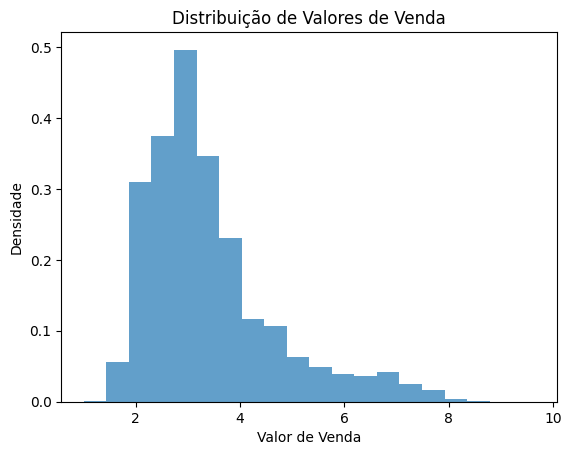

In [ ]:
# Limpa a coluna 'Valor de Venda' e converte para float
combustiveis_automotivos_df['Valor de Venda'] = pd.to_numeric(combustiveis_automotivos_df['Valor de Venda'], errors='coerce')

# Remove linhas com valores ausentes em 'Valor de Venda'
combustiveis_automotivos_df = combustiveis_automotivos_df.dropna(subset=['Valor de Venda'])

# Calcula a distribuição dos valores de venda
hist, edges = np.histogram(combustiveis_automotivos_df['Valor de Venda'], bins=20, density=True)
bin_labels = [f"{edges[i]:.2f} - {edges[i+1]:.2f}" for i in range(len(edges)-1)]
combustiveis_automotivos_df['distribuicao_vendas'] = pd.cut(combustiveis_automotivos_df['Valor de Venda'], bins=edges, labels=bin_labels, include_lowest=True)

# Plota o histograma da distribuição de valores de venda
plt.hist(combustiveis_automotivos_df['Valor de Venda'], bins=20, density=True, alpha=0.7)
plt.xlabel('Valor de Venda')
plt.ylabel('Densidade')
plt.title('Distribuição de Valores de Venda')
plt.show()


A coluna "distribuicao_vendas" se refere à distribuição das vendas de combustíveis. Pelo seu tipo de dado "category", parece que ela contém categorias que representam diferentes tipos de distribuição de vendas de combustíveis.

Geralmente, a distribuição de vendas de combustíveis se refere à forma como os produtos de combustíveis são distribuídos do produtor até o consumidor final. Isso pode incluir diferentes etapas intermediárias, como refinarias, distribuidoras, postos de gasolina e outros pontos de venda.

As categorias presentes na coluna "distribuicao_vendas" podem indicar diferentes aspectos da distribuição de vendas, como a origem do combustível (nacional ou importado), o tipo de distribuição (direta, através de distribuidoras, etc.) ou outras categorias relevantes para o mercado de combustíveis.

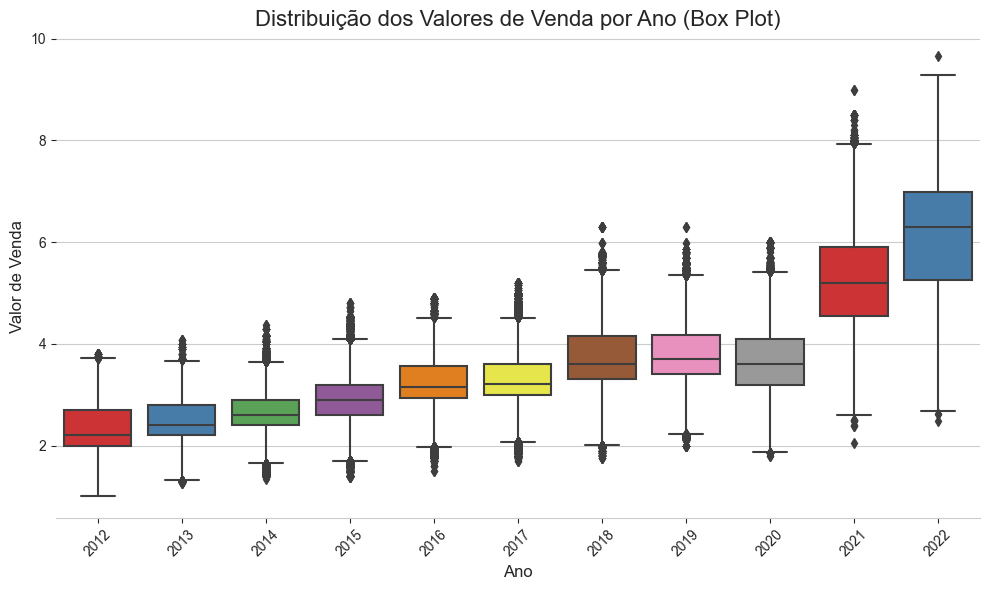

In [ ]:
import seaborn as sns

# Extrai o ano da coluna 'Data da Coleta'
combustiveis_automotivos_df['Ano'] = combustiveis_automotivos_df['Data da Coleta'].dt.year

# Configuração de estilo Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set1")

# Criação do gráfico de box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=combustiveis_automotivos_df, x='Ano', y='Valor de Venda', palette='Set1')

# Título e rótulos
plt.title('Distribuição dos Valores de Venda por Ano (Box Plot)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)
sns.despine(left=True)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
combustiveis_automotivos_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11168709 entries, 2012-01-03 to 2022-12-30
Data columns (total 9 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Regiao - Sigla       object  
 1   Estado - Sigla       object  
 2   Municipio            object  
 3   Produto              object  
 4   Valor de Venda       float64 
 5   Unidade de Medida    object  
 6   Bandeira             object  
 7   distribuicao_vendas  category
 8   Ano                  int32   
dtypes: category(1), float64(1), int32(1), object(6)
memory usage: 734.9+ MB


In [ ]:
combustiveis_automotivos_df = combustiveis_automotivos_df.set_index('Data da Coleta')
combustiveis_automotivos_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,distribuicao_vendas,Ano
Data da Coleta,,,,,,,,,
2012-01-03,SE,SP,GUARULHOS,GASOLINA,2.589,Litro,PETROBRAS DISTRIBUIDORA S.A.,2.31 - 2.74,2012
2012-01-03,SE,SP,GUARULHOS,ETANOL,1.969,Litro,PETROBRAS DISTRIBUIDORA S.A.,1.87 - 2.31,2012
2012-01-03,SE,SP,GUARULHOS,DIESEL,1.879,Litro,PETROBRAS DISTRIBUIDORA S.A.,1.87 - 2.31,2012
2012-01-05,CO,DF,BRASILIA,GASOLINA,2.830,Litro,PETROBRAS DISTRIBUIDORA S.A.,2.74 - 3.17,2012
2012-01-05,CO,DF,BRASILIA,ETANOL,2.270,Litro,PETROBRAS DISTRIBUIDORA S.A.,1.87 - 2.31,2012


In [ ]:
top_10_mais_caros = combustiveis_automotivos_df.sort_values('Valor de Venda', ascending=False).head(10)
top_10_mais_caros

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,distribuicao_vendas,Ano
Data da Coleta,,,,,,,,,
2022-12-27,SE,SP,SAO PAULO,DIESEL S10,9.65,Litro,IPIRANGA,9.22 - 9.65,2022
2022-07-05,SE,RJ,MAGE,GASOLINA ADITIVADA,9.28,Litro,VIBRA ENERGIA,9.22 - 9.65,2022
2022-06-20,SE,RJ,MAGE,GASOLINA ADITIVADA,9.27,Litro,VIBRA ENERGIA,9.22 - 9.65,2022
2022-06-09,SE,RJ,MAGE,GASOLINA ADITIVADA,9.27,Litro,VIBRA ENERGIA,9.22 - 9.65,2022
2022-06-22,CO,MT,ALTA FLORESTA,DIESEL S10,9.15,Litro,CIAPETRO,8.79 - 9.22,2022
2022-03-30,SE,SP,BARUERI,GASOLINA ADITIVADA,9.09,Litro,VIBRA ENERGIA,8.79 - 9.22,2022
2022-03-30,SE,SP,BARUERI,GASOLINA ADITIVADA,9.09,Litro,VIBRA ENERGIA,8.79 - 9.22,2022
2022-03-30,SE,SP,BARUERI,GASOLINA ADITIVADA,9.09,Litro,VIBRA ENERGIA,8.79 - 9.22,2022
2022-03-30,SE,SP,BARUERI,GASOLINA ADITIVADA,9.09,Litro,VIBRA ENERGIA,8.79 - 9.22,2022


In [ ]:
top_10_mais_baratos = combustiveis_automotivos_df.sort_values('Valor de Venda', ascending=True).head(10)
top_10_mais_baratos

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,distribuicao_vendas,Ano
Data da Coleta,,,,,,,,,
2012-02-14,SE,SP,VARZEA PAULISTA,GNV,1.009,m³,BRANCA,1.01 - 1.44,2012
2012-02-21,SE,SP,VARZEA PAULISTA,GNV,1.009,m³,BRANCA,1.01 - 1.44,2012
2012-04-09,SE,SP,SAO CAETANO DO SUL,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-01-24,SE,SP,SAO CAETANO DO SUL,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-02-13,SE,SP,SAO CAETANO DO SUL,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-02-14,SE,SP,SAO PAULO,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-02-20,SE,SP,SAO CAETANO DO SUL,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-01-17,SE,SP,SAO CAETANO DO SUL,GNV,1.189,m³,BRANCA,1.01 - 1.44,2012
2012-05-22,S,PR,CURITIBA,GNV,1.190,m³,BRANCA,1.01 - 1.44,2012


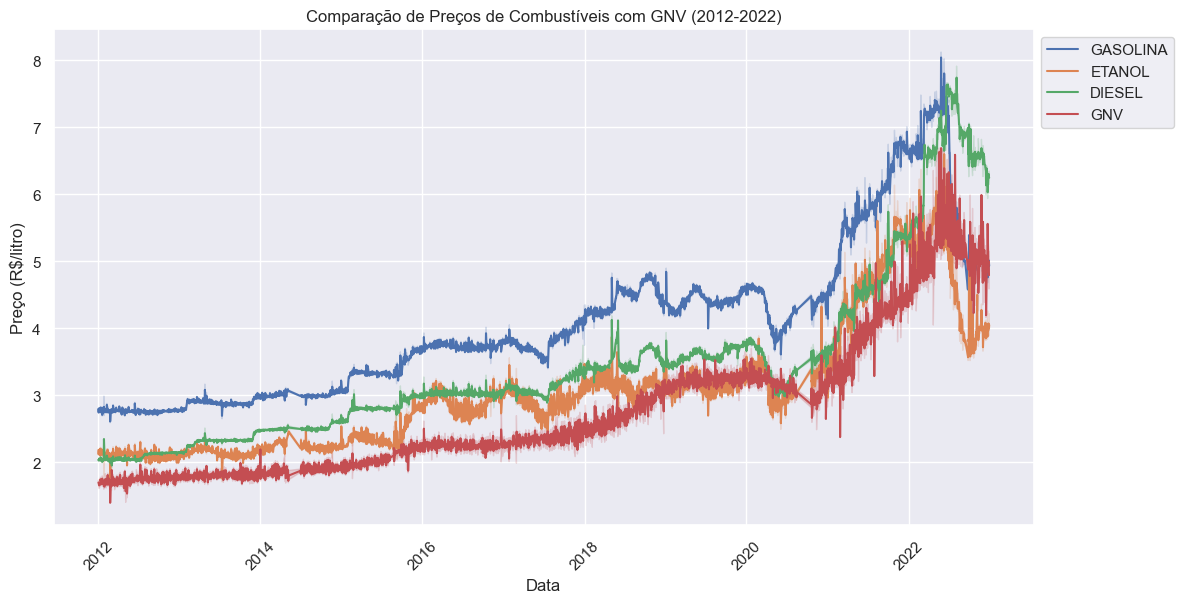

In [ ]:
# Filtrar apenas os dados de GNV e outros combustíveis
combustiveis_selecionados = ['GNV', 'GASOLINA', 'ETANOL', 'DIESEL']
combustiveis_df = combustiveis_automotivos_df[combustiveis_automotivos_df['Produto'].isin(combustiveis_selecionados)]

# Criar um gráfico de séries temporais usando lineplot do Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

# Usar o lineplot para cada tipo de combustível
sns.lineplot(data=combustiveis_df, x=combustiveis_df.index, y='Valor de Venda', hue='Produto')

plt.title('Comparação de Preços de Combustíveis com GNV (2012-2022)')
plt.xlabel('Data')
plt.ylabel('Preço (R$/litro)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ordena os dados por data
data = combustiveis_automotivos_df.sort_values('Data da Coleta')

# Dividindo os dados em treino e teste (por exemplo, usando os últimos 100 registros como teste)
train_data = data[:-100]
test_data = data[-100:]

# Definindo os parâmetros do modelo ARIMA
p, d, q = 1, 1, 1

# Cria o modelo ARIMA
model = ARIMA(train_data['Valor de Venda'], order=(p, d, q))
model_fit = model.fit(disp=0)

# Realiza previsões
forecast_steps = len(test_data)
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

# Adiciona as previsões ao DataFrame de teste
test_data['Previsão'] = forecast

# Exibe os resultados em uma tabela
results_table = test_data[['Data da Coleta', 'Valor de Venda', 'Previsão']]
print(results_table)
